In [337]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

analyzer = plots.DataAnalyser()

# def r2(x,y):
#     # Linear regression (1st-degree polynomial)
#     coeffs = np.polyfit(x, y, 1)
#     y_pred = np.polyval(coeffs, x)


#     # R-squared calculation
#     ss_res = np.sum((y - y_pred)**2)
#     ss_tot = np.sum((y - np.mean(y))**2)
#     r_squared = 1 - (ss_res / ss_tot)

#     r_squared_2 = r2_score(y, y_pred)

#     if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

#     # Print R²
#     print(f"R²: {r_squared:.4f}")

def r2(x,y,deg):
    # Linear regression (1st-degree polynomial)
    coeffs = np.polyfit(x, y, deg)
    model = np.poly1d(coeffs)
    y_pred = model(x)


    # R-squared calculation
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    r_squared_2 = r2_score(y, y_pred)

    if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

    # Print R²
    print(f"R²: {r_squared:.4f}")
    return model



In [338]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
path = 'dataset_metadata_official.csv'
df_total = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_total[(df_total['mpc_success'] == True) & (df_total['mpc_RMSe'] <= 0.5) & (df_total['nn_success'] == True)]
print('len reasonable', len(df_reasonable))
df_reasonable.groupby('trajectory_type').count()

len reasonable 65


,sim_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,mpc_execution_time (s),...,period (s),inter_position_RMSe,RMSe_u0,RMSe_u1,RMSe_u2,RMSe_u3,RMSe_u4,RMSe_u5,RMSe_u6,RMSe_u7
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
circle_xz,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
line,19,19,19,19,19,19,19,19,19,19,...,0,19,19,19,19,19,19,19,19,19
lissajous_xy,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [339]:
df_reasonable.sort_values('nn_execution_time (s)', ascending=False)[['sim_id','trajectory_type', 'nn_execution_time (s)']]
df_reasonable.sort_values('nn_RMSe', ascending=True)[['sim_id','trajectory_type', 'nn_RMSe']]

,sim_id,trajectory_type,nn_RMSe
94,23,lissajous_xy,0.065126
88,16,lissajous_xy,0.073348
82,9,lissajous_xy,0.088287
95,24,lissajous_xy,0.091482
89,17,lissajous_xy,0.117329
...,...,...,...
126,27,line,0.494532
130,31,line,0.507313
177,38,circle_xy,0.507504
70,7,circle_xz,0.516662


percentile 2 (0.95) = 0.5075039753004983


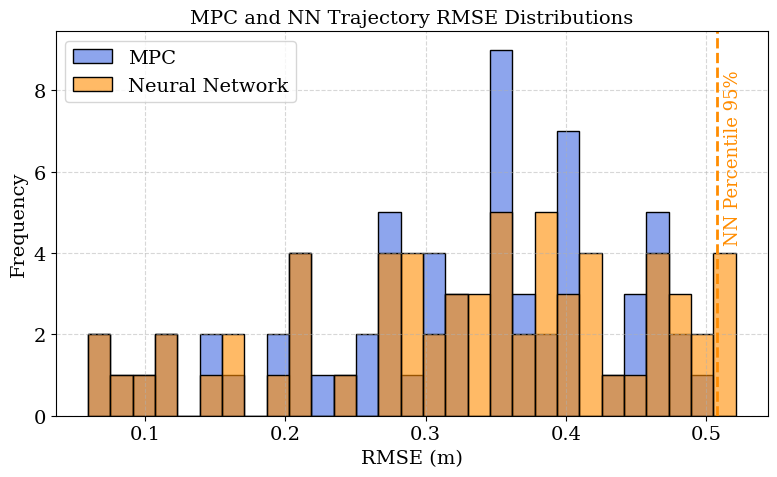

In [340]:
analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trajectory_rmse.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


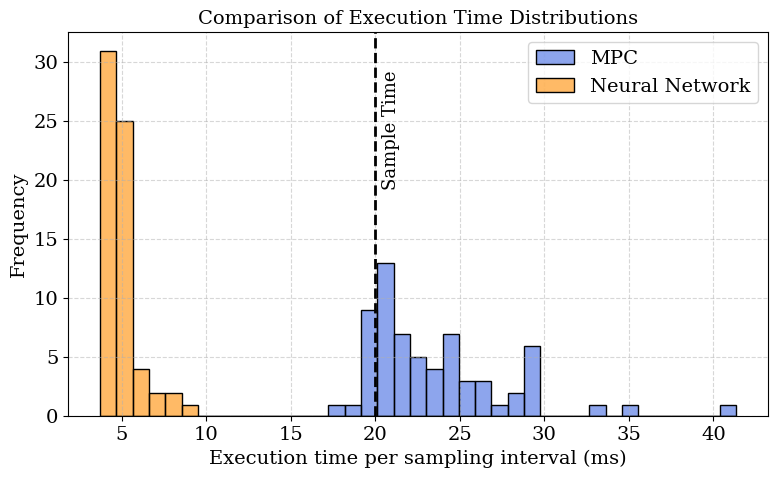

In [341]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=40)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [342]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.059345,0.496112,0.314924,0.114516
1,Neural Network,0.065126,0.520974,0.333001,0.122307


In [343]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.017538,0.041351,0.023621,0.004318
1,Neural Network,0.003715,0.008716,0.004960,0.001023


C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\991164806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\991164806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)


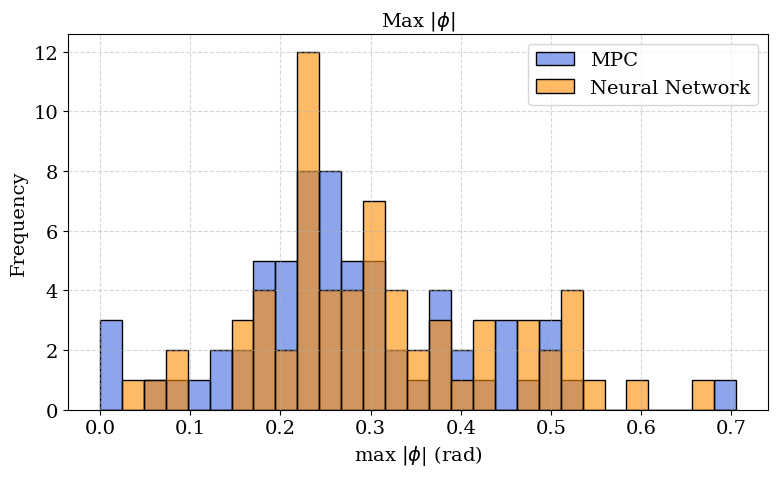

In [344]:
df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [345]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi (rad)')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.863060e-08,0.705262,0.224519,0.129138
1,Neural Network,4.554505e-02,0.679987,0.253867,0.134450


C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\269989624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\269989624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)


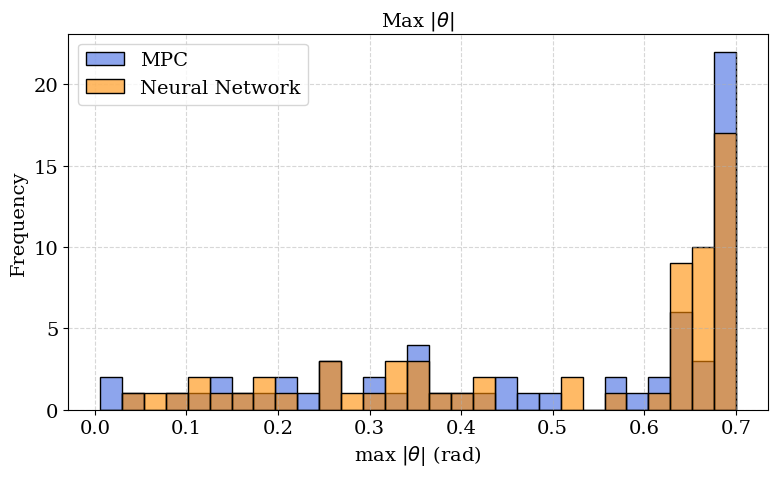

In [346]:
df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\571555454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\571555454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)


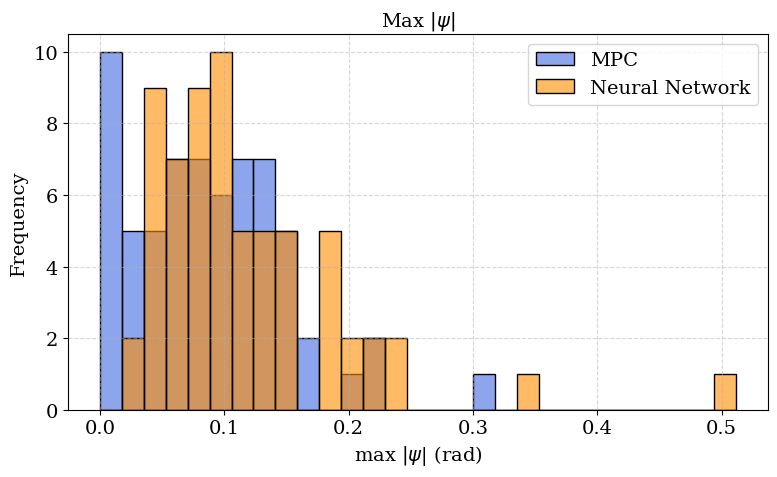

In [347]:
df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [348]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [349]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

percentile 0.95 = 0.21587987250809


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:612: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


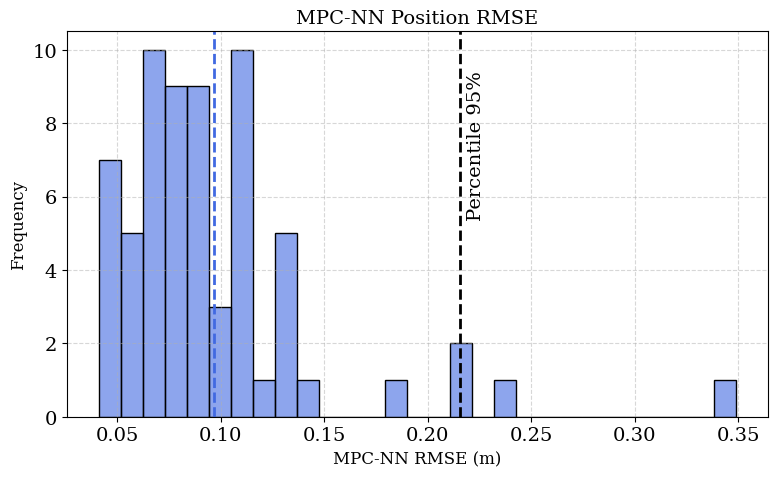

In [350]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95, save_name='inter-rmse.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\1614591183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


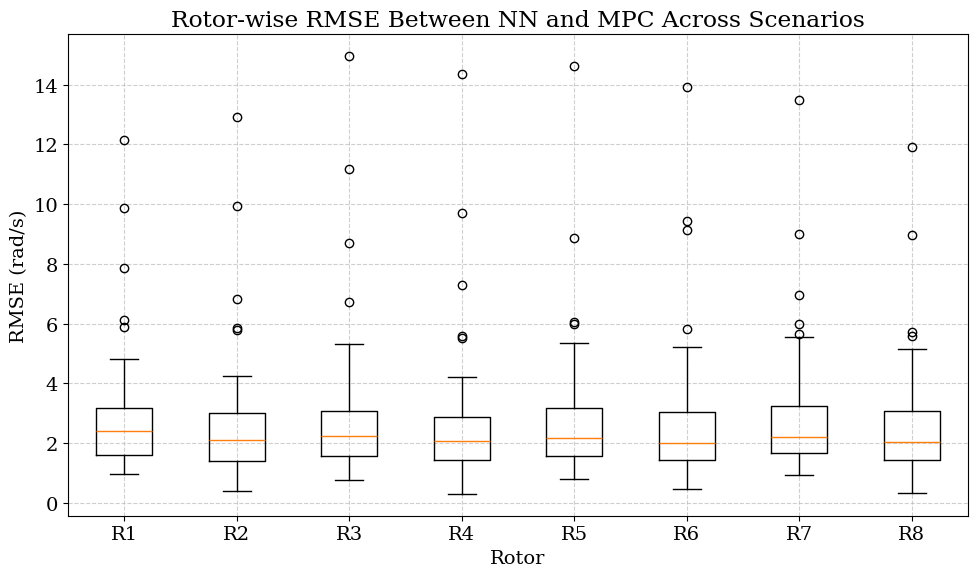

In [351]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots.pdf')
plt.show()

In [352]:
df_reasonable[df_reasonable['RMSe_u0'] > 4][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
70,0.440967,0.516662
73,0.319212,0.353242
109,0.203797,0.279695
115,0.214389,0.355044
121,0.250166,0.288902
128,0.327255,0.457485
130,0.353991,0.507313


In [353]:
df_reasonable.groupby('trajectory_type').size()

trajectory_type
circle_xy       26
circle_xz        2
line            19
lissajous_xy    18
dtype: int64

In [354]:
# 01/07/2025 - Same dataset for normal and single-rotor failures
# Load the dataset
df_total = pd.read_csv('dataset_metadata_with_1rf.csv')
#df_total = pd.read_csv('temp-delete.csv')
df_total = df_total[~df_total['trajectory_type'].str.contains('#')] #TODO: descomentar
df_total['global_id'] = df_total['trajectory_type'] + df_total['trajectory_id'].astype(str)
df_total[df_total['mpc_success'] == True]
df_total['perc_diff'] = (df_total['nn_RMSe'] - df_total['mpc_RMSe']) / df_total['mpc_RMSe']
df_total['nn_max_abs_phi'] = np.max(np.abs(df_total[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_total['mpc_max_abs_phi'] = np.max(np.abs(df_total[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df_total['nn_max_abs_theta'] = np.max(np.abs(df_total[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_total['mpc_max_abs_theta'] = np.max(np.abs(df_total[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df_total['nn_max_abs_psi'] = np.max(np.abs(df_total[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_total['mpc_max_abs_psi'] = np.max(np.abs(df_total[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)
#df_total = df_total[~((df_total['trajectory_type'].str.contains('lissajous_xy')) & (df_total['radius (m)'] <= 1.5))] # TODO: deletar
# Split into normal and rotor failure datasets
df_normal = df_total[df_total['operation_mode'] == 'normal']
df_rotor_failure = df_total[df_total['operation_mode'] == 'total_failure']


In [ ]:
# Filters - RMSe < 0.5 para operação normal. O dataset com rotor failure deve ser filtrado para conter as mesmas trajetórias que o normal

df_normal = df_normal[df_normal['mpc_RMSe'] < 0.5]
df_normal = df_normal[df_normal['perc_diff'] < 0.5]


df_rotor_failure = df_rotor_failure[df_rotor_failure['global_id'].isin(df_normal['global_id'])]
df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 0.75]
df_rotor_failure = df_rotor_failure[df_rotor_failure['perc_diff'] > -0.3]
df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] < 1.2]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] <= 2] # TODO: TEMP DELETE
df_normal = df_normal[df_normal['global_id'].isin(df_rotor_failure['global_id'])]


# print('len df_normal',len(df_normal), 'len df_rotor_failure', len(df_rotor_failure))


In [356]:
# Groupby
df_normal.groupby('trajectory_type')['N'].count()

trajectory_type
circle_xy       11
line            20
lissajous_xy    36
Name: N, dtype: int64

percentile 2 (0.95) = 0.5075039753004983


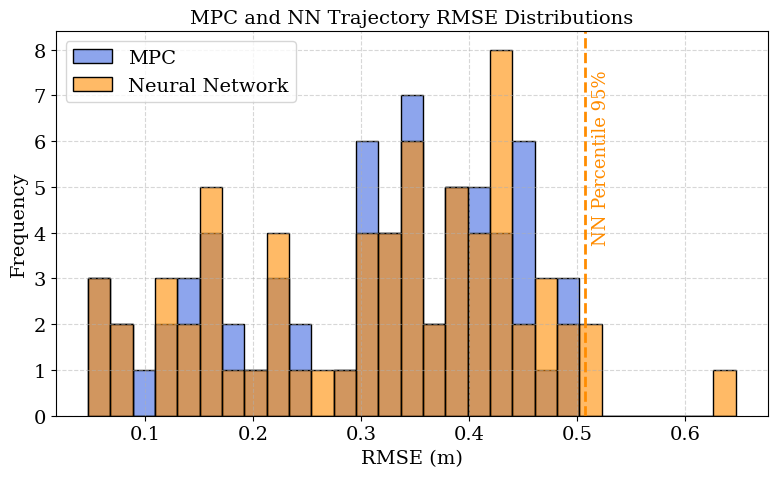

In [357]:
analyzer.plot_histogram(df_normal, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_normal.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)

In [358]:
stats_rmse = analyzer.stats_simulations(df_normal, 'mpc_RMSe', 'nn_RMSe')
print('Normal Trajectory RMSE stats')
stats_rmse

Normal Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.047455,0.496112,0.303979,0.126361
1,Neural Network,0.058555,0.646618,0.316347,0.135551


471            line
75        circle_xy
165       circle_xy
197    lissajous_xy
159       circle_xy
           ...     
279    lissajous_xy
219    lissajous_xy
261    lissajous_xy
275    lissajous_xy
175    lissajous_xy
Name: trajectory_type, Length: 67, dtype: object
percentile 1 (0.95) = 0.6374276986016255
percentile 2 (0.95) = 0.5975373317835176


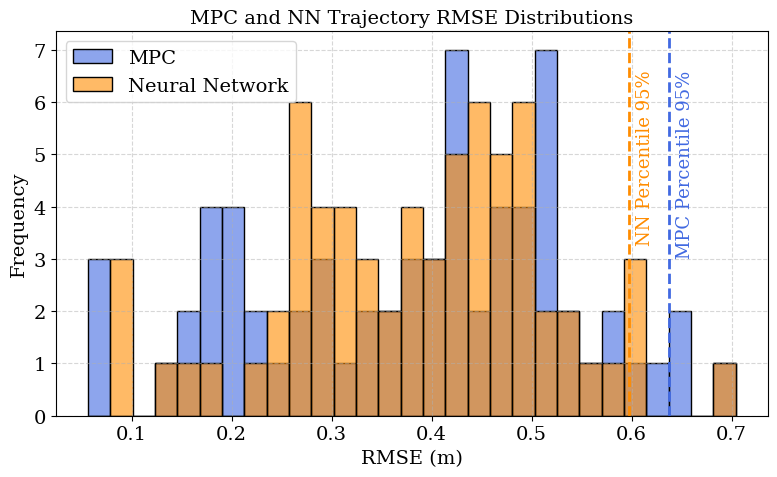

In [359]:
print(df_rotor_failure.sort_values('mpc_RMSe', ascending=False)['trajectory_type'])
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 2] # Offset, pode tirar
analyzer.plot_histogram(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_1rf.pdf', percentile_1=0.95,percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)

In [360]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe')
print('Single Rotor Failure Trajectory RMSE stats')
stats_rmse

Single Rotor Failure Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.056640,0.699836,0.383110,0.157700
1,Neural Network,0.085136,0.703886,0.383127,0.131622


C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\140862616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


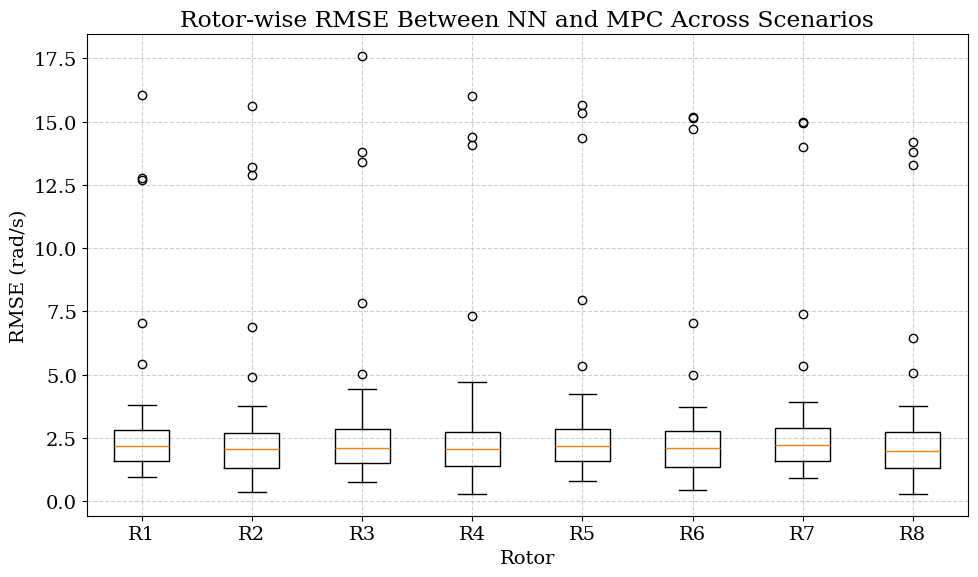

In [361]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_normal.pdf')
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_32360\241932331.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


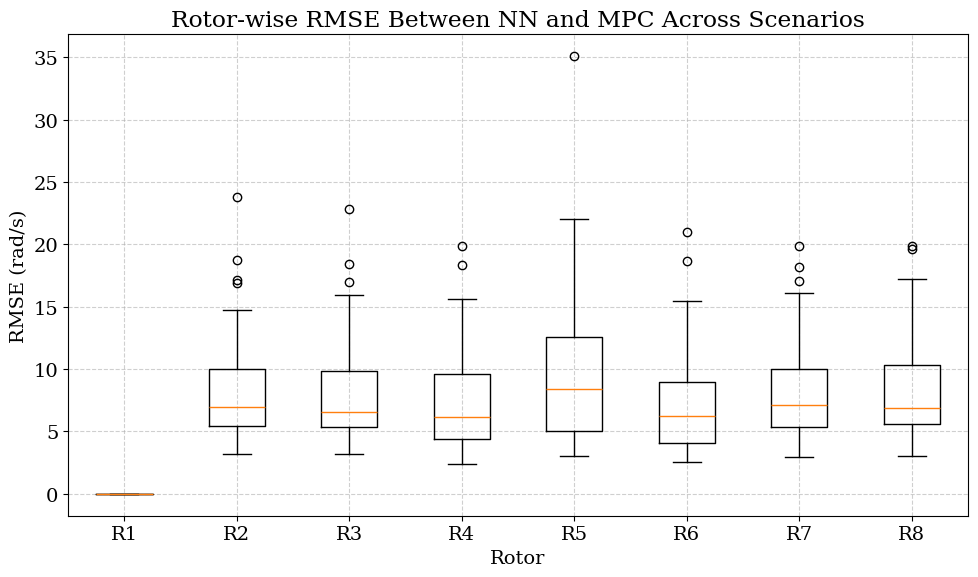

In [362]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_1rf.pdf')
plt.show()

percentile 0.95 = 0.2638678497744033


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:612: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


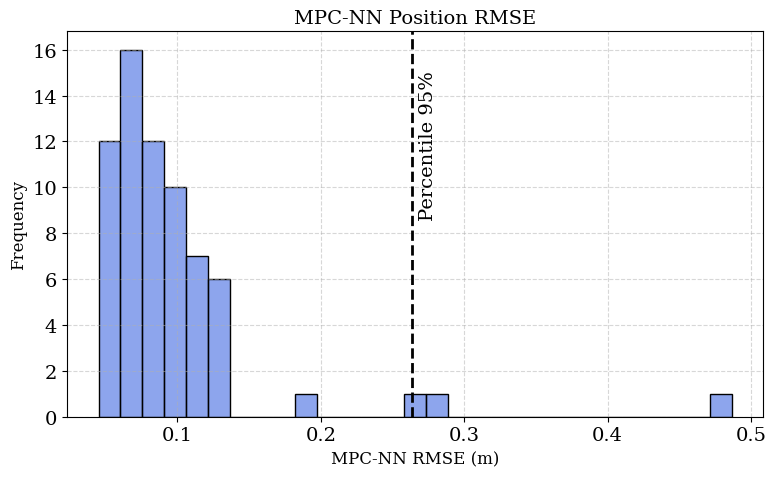

In [363]:
analyzer.plot_histogram_temp(df_normal, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_normal.pdf')

In [364]:
stats_rmse = analyzer.stats_simulations(df_normal, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.045138,0.486279,0.096506,0.063534
1,Neural Network,0.045138,0.486279,0.096506,0.063534


percentile 0.95 = 0.4571839252200101


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:612: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


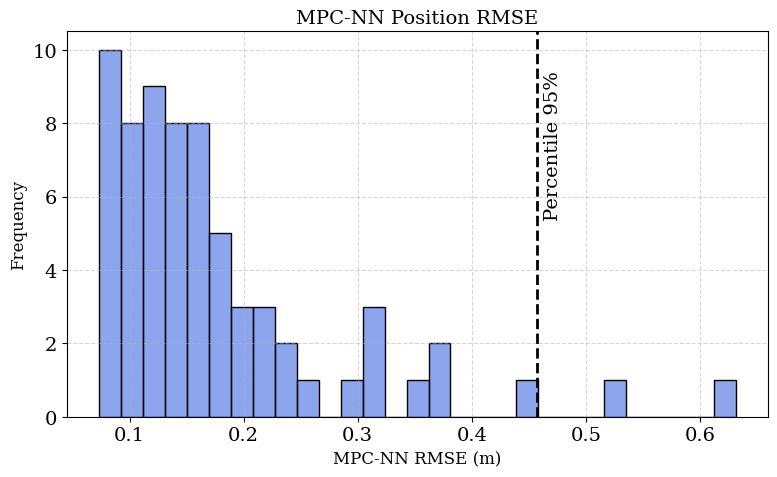

    trajectory_type  sim_id  perc_diff
159       circle_xy     160  -0.272328
233    lissajous_xy      60  -0.266581
197    lissajous_xy      24  -0.236623
49        circle_xy      50  -0.233278
287    lissajous_xy     114  -0.230916
..              ...     ...        ...
261    lissajous_xy      88   0.490074
175    lissajous_xy       2   0.513834
279    lissajous_xy     106   0.572945
249    lissajous_xy      76   0.671903
221    lissajous_xy      48   0.677447

[67 rows x 3 columns]


In [365]:
analyzer.plot_histogram_temp(df_rotor_failure, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_1rf.pdf')
print(df_rotor_failure.sort_values('perc_diff',ascending=True)[['trajectory_type','sim_id','perc_diff']])

In [366]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.073151,0.631479,0.177637,0.108615
1,Neural Network,0.073151,0.631479,0.177637,0.108615


In [367]:
df_rotor_failure.sort_values('perc_diff')['trajectory_type']

159       circle_xy
233    lissajous_xy
197    lissajous_xy
49        circle_xy
287    lissajous_xy
           ...     
261    lissajous_xy
175    lissajous_xy
279    lissajous_xy
249    lissajous_xy
221    lissajous_xy
Name: trajectory_type, Length: 67, dtype: object

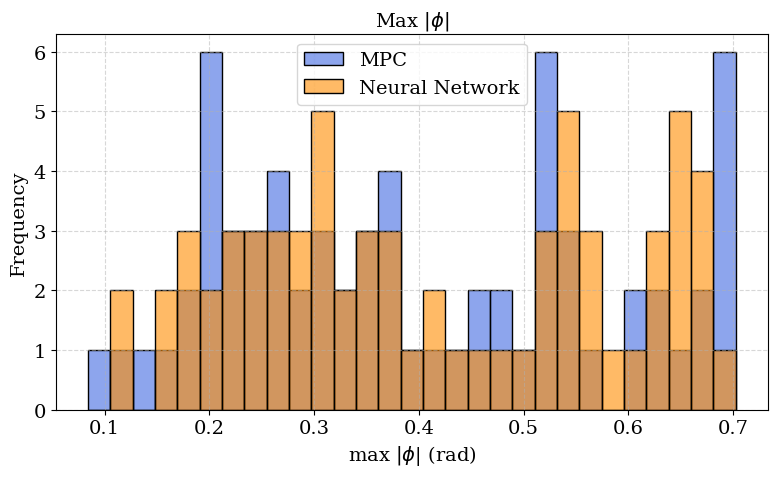

In [368]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

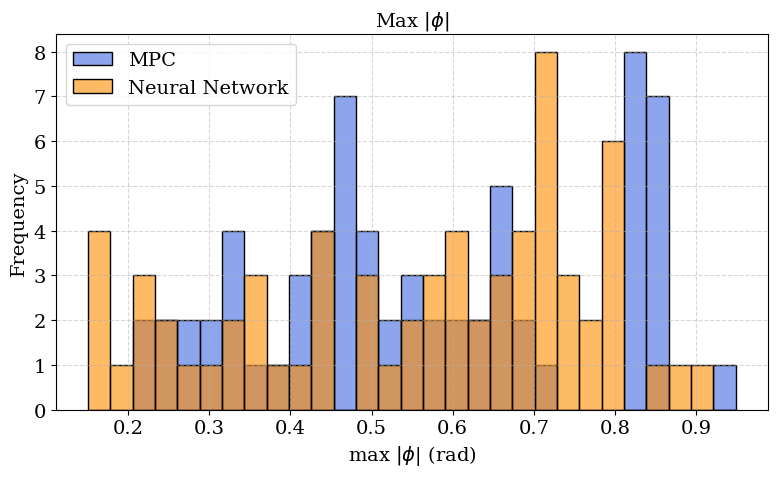

     sim_id  trajectory_id trajectory_type  mpc_max_abs_phi
221      48             24    lissajous_xy         0.948412
393      60             30            line         0.864666
347      14              7            line         0.864660
449     116             58            line         0.864652
49       50             25       circle_xy         0.864643
..      ...            ...             ...              ...
389      56             28            line         0.280028
161     162             81       circle_xy         0.241966
345      12              6            line         0.238163
115     116             58       circle_xy         0.225300
233      60             30    lissajous_xy         0.223070

[67 rows x 4 columns]


In [369]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)
print(df_rotor_failure.sort_values('mpc_max_abs_phi', ascending=False)[['sim_id','trajectory_id','trajectory_type','mpc_max_abs_phi']])

R²: 0.1505
R²: 0.2328


poly1d([0.61699068, 0.2182663 ])

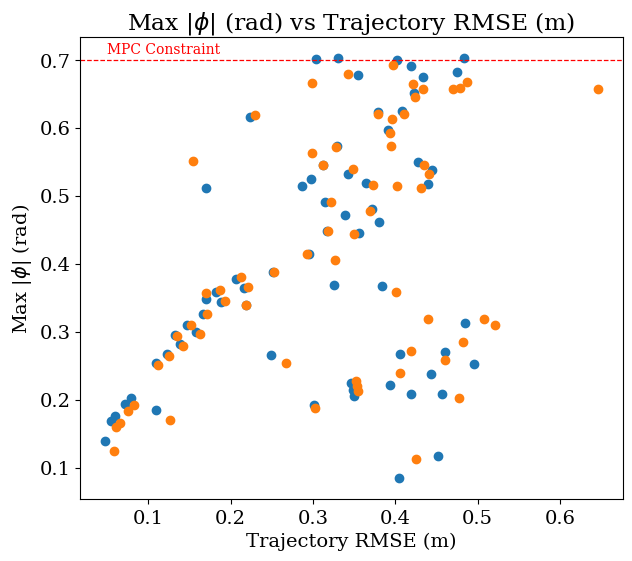

In [370]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_normal['mpc_RMSe'],df_normal['mpc_max_abs_phi'])
ax.scatter(df_normal['nn_RMSe'],df_normal['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.05, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_normal['mpc_RMSe'], df_normal['mpc_max_abs_phi'],1)
r2(df_normal['nn_RMSe'], df_normal['nn_max_abs_phi'],1)

R²: 0.0014
R²: 0.5894


poly1d([1.23162254, 0.08052722])

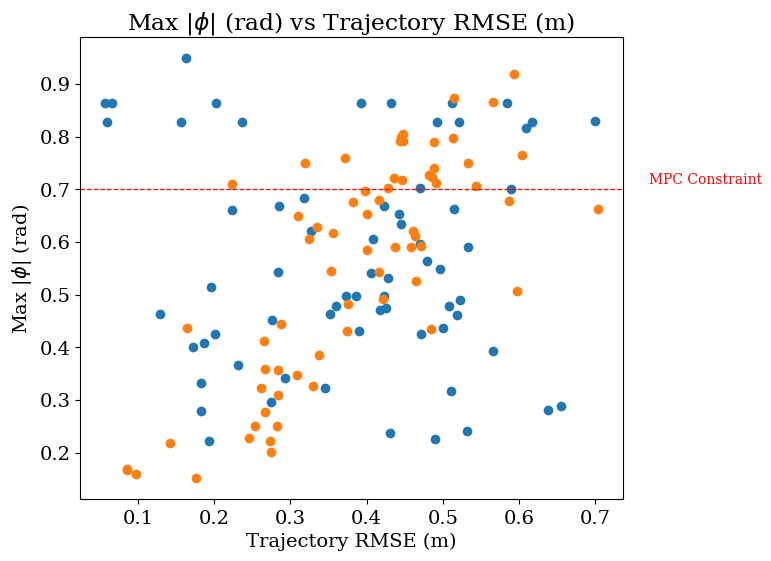

In [371]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_phi'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_phi'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_phi'],1)

R²: 0.5995
R²: 0.6252


poly1d([ 1.13402268, -0.00466127])

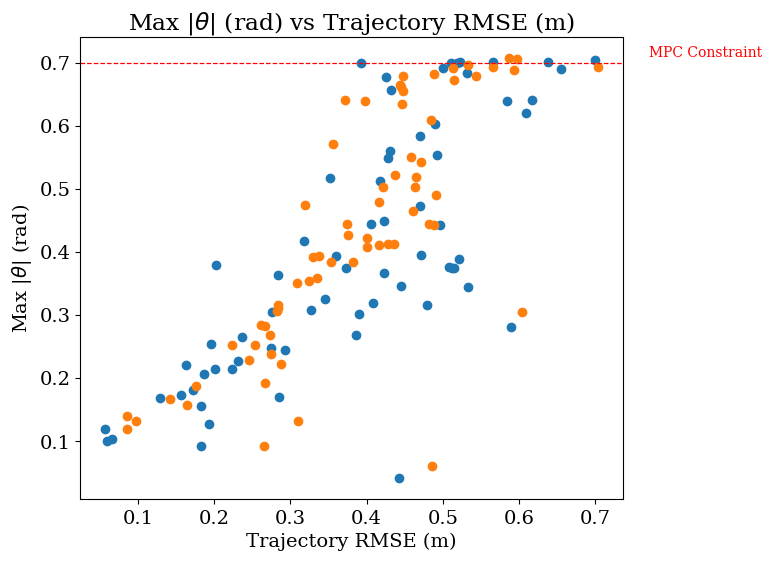

In [372]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_theta'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_theta'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\theta$| (rad)')
ax.set_title('Max |$\\theta$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_theta'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_theta'],1)

R²: 0.0602
R²: 0.3652


poly1d([ 0.62310331, -0.05219059])

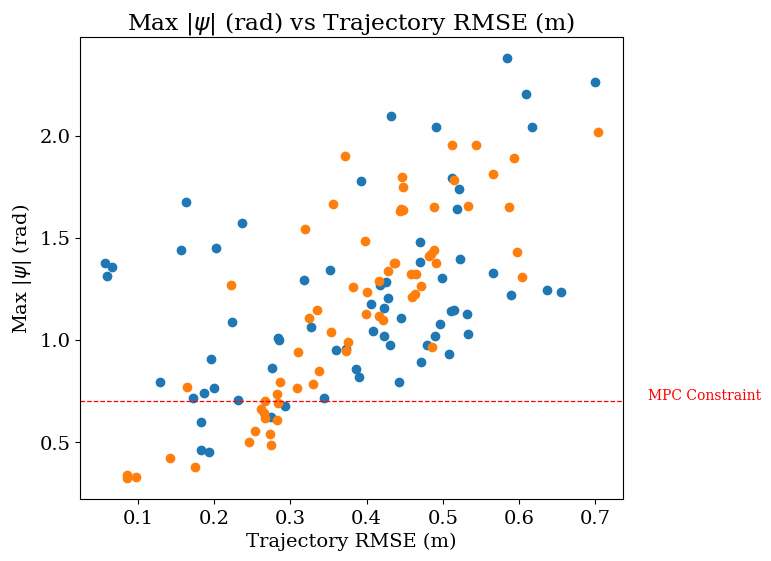

In [390]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_phi'] + df_rotor_failure['nn_max_abs_theta'] + df_rotor_failure['nn_max_abs_psi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_psi'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'],1)

R²: 0.1398


Text(0.77, 0.71, 'MPC Constraint')

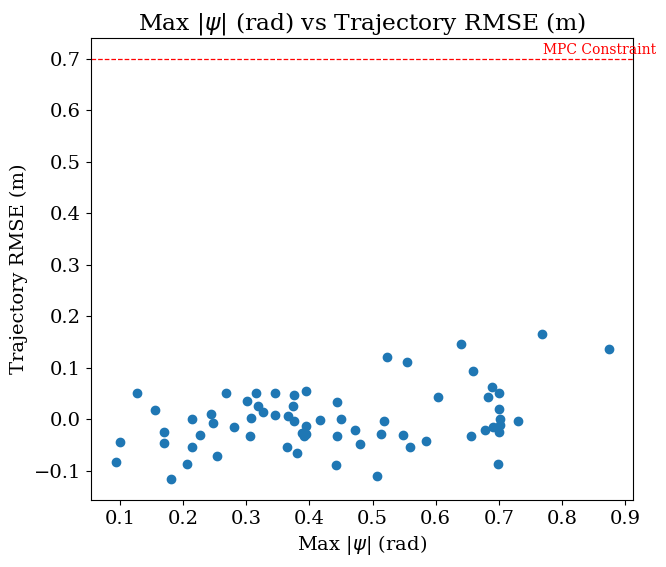

In [374]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

model = r2(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1), df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'], 2)

#Normal
ax.scatter(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'])
#ax.plot(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),model(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)


R²: 0.2017


Text(0.5, 1.0, 'Max |$\\psi$| (rad) vs Trajectory RMSE (m)')

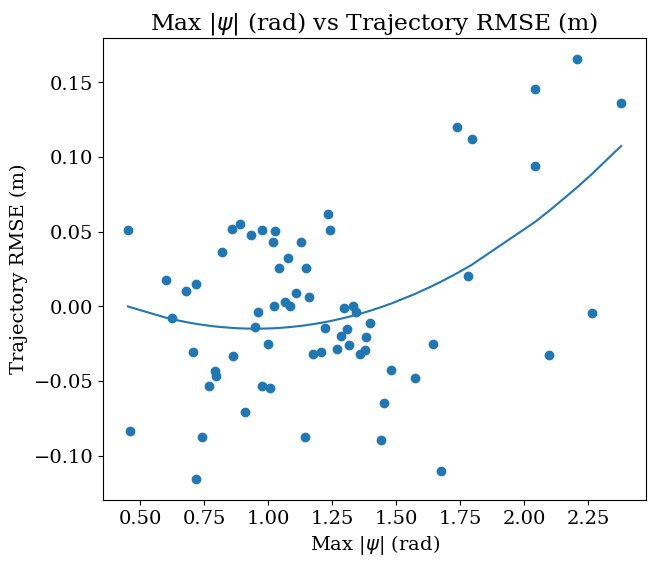

In [389]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#df_rotor_failure['alpha'] = np.max(df_rotor_failure[['mpc_max_abs_phi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)
df_rotor_failure['alpha'] = df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi']
temp = df_rotor_failure.sort_values('alpha',ascending=True)
#temp = temp[temp['period (s)'] > 0]
x = temp['alpha']
y = temp['mpc_RMSe'] - temp['nn_RMSe']

model = r2(x,y,2)

#Normal
ax.scatter(x,y)
ax.plot(x, model(x))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

In [376]:

#r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'])

In [377]:
print(df_rotor_failure.sort_values('nn_max_abs_phi',ascending=False)[['trajectory_type','nn_max_abs_phi', 'radius (m)', 'period (s)']])

    trajectory_type  nn_max_abs_phi  radius (m)  period (s)
75        circle_xy        0.919344         5.0        11.0
95        circle_xy        0.874060         5.0        12.0
119       circle_xy        0.864827         6.0        13.0
49        circle_xy        0.804710         4.0         9.0
137       circle_xy        0.799296         5.5        14.0
..              ...             ...         ...         ...
235    lissajous_xy        0.200416         1.5         7.0
175    lissajous_xy        0.168525         0.5         5.0
275    lissajous_xy        0.167288         1.0         8.5
261    lissajous_xy        0.159119         1.0         8.0
219    lissajous_xy        0.151017         1.0         6.5

[67 rows x 4 columns]


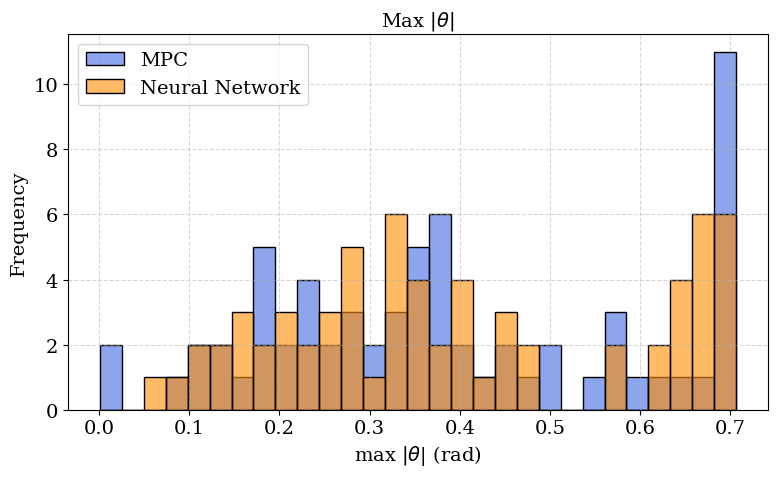

In [378]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

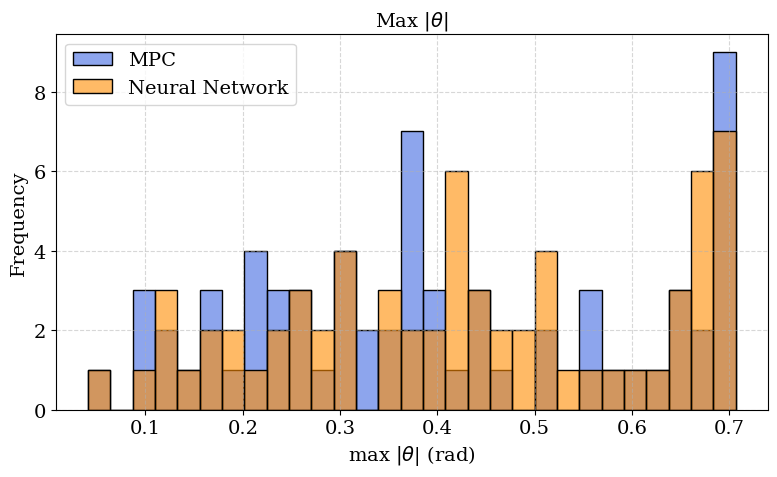

In [379]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

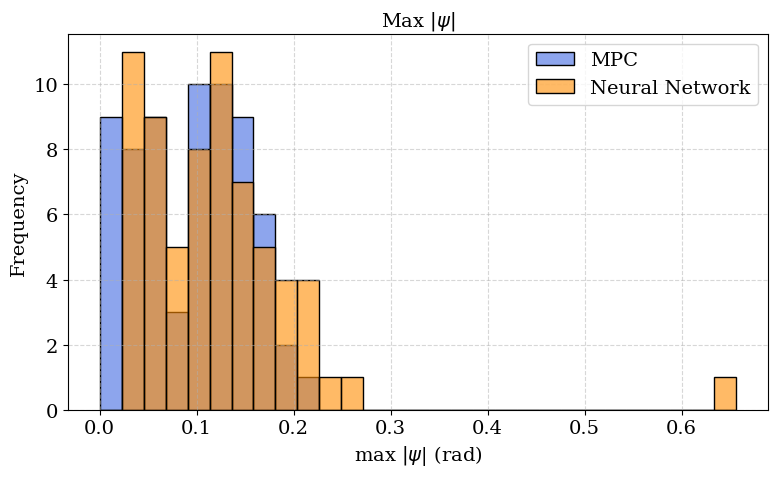

In [380]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

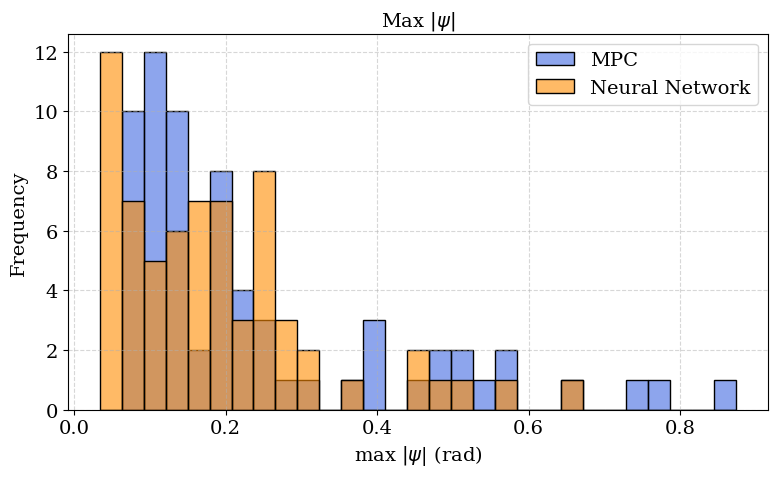

In [381]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [382]:
print('maximum nn RMSEs')
df_total.sort_values('nn_RMSe',ascending=False)[['sim_id','trajectory_type','radius (m)', 'period (s)', 'nn_RMSe']]

maximum nn RMSEs


,sim_id,trajectory_type,radius (m),period (s),nn_RMSe
29,30,circle_xy,6.0,5.0,8.120072
11,12,circle_xy,6.0,2.0,7.823842
10,11,circle_xy,6.0,2.0,7.618122
4,5,circle_xy,6.0,1.0,7.172918
5,6,circle_xy,6.0,1.0,7.108989
...,...,...,...,...,...
216,43,lissajous_xy,0.5,6.5,0.047134
230,57,lissajous_xy,0.5,7.0,0.045128
258,85,lissajous_xy,0.5,8.0,0.045021
244,71,lissajous_xy,0.5,7.5,0.044897


In [383]:
print('cases where nn_RMSE < mpc_RMSE')
df_nn_lower_than_mpc = df_total[df_total['nn_RMSe'] < df_total['mpc_RMSe']]
print('number of cases:',len(df_nn_lower_than_mpc))
print(df_nn_lower_than_mpc.groupby(['trajectory_type','operation_mode']).count()['nn_RMSe'])

cases where nn_RMSE < mpc_RMSE
number of cases: 196
trajectory_type  operation_mode
circle_xy        normal             9
                 total_failure     46
line             normal            26
                 total_failure     48
lissajous_xy     normal            21
                 total_failure     46
Name: nn_RMSe, dtype: int64


In [384]:
df_rotor_failure.sort_values('mpc_max_abs_phi',ascending=False)[['trajectory_type','operation_mode','mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe']].head(20)

,trajectory_type,operation_mode,mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe
221,lissajous_xy,total_failure,0.948412,0.222599,0.162856,0.273182
393,line,total_failure,0.864666,0.526764,0.432394,0.464567
347,line,total_failure,0.864660,0.357916,0.202189,0.266643
449,line,total_failure,0.864652,0.758615,0.392366,0.371888
49,circle_xy,total_failure,0.864643,0.804710,0.584177,0.447901
261,lissajous_xy,total_failure,0.864630,0.159119,0.065496,0.097594
175,lissajous_xy,total_failure,0.864611,0.168525,0.056640,0.085744
271,lissajous_xy,total_failure,0.864576,0.585546,0.511923,0.399799
471,line,total_failure,0.828869,0.663095,0.699836,0.703886
237,lissajous_xy,total_failure,0.826932,0.310319,0.236085,0.284075


In [385]:
df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] > 0.7].groupby('trajectory_type').count()
#print(len(df_normal),len(df_rotor_failure))

,sim_id,trajectory_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,...,RMSe_u7,global_id,perc_diff,nn_max_abs_phi,mpc_max_abs_phi,nn_max_abs_theta,mpc_max_abs_theta,nn_max_abs_psi,mpc_max_abs_psi,alpha
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
line,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
lissajous_xy,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [386]:
# Trajetorias com baixo perc_diff
df_rotor_failure[df_rotor_failure['trajectory_type'] == 'circle_xy'].sort_values('inter_position_RMSe',ascending=True)[['sim_id','trajectory_type','period (s)','radius (m)', 'mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe','global_id']]

,sim_id,trajectory_type,period (s),radius (m),mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe,global_id
137,138,circle_xy,14.0,5.5,0.474726,0.799296,0.424858,0.444646,circle_xy69
163,164,circle_xy,15.0,7.0,0.488944,0.750609,0.522308,0.533050,circle_xy82
115,116,circle_xy,13.0,5.0,0.225300,0.792038,0.490197,0.447241,circle_xy58
95,96,circle_xy,12.0,5.0,0.435947,0.874060,0.499621,0.514613,circle_xy48
161,162,circle_xy,15.0,6.5,0.241966,0.790227,0.531368,0.488143,circle_xy81
119,120,circle_xy,13.0,6.0,0.392896,0.864827,0.565672,0.565472,circle_xy60
165,166,circle_xy,15.0,7.5,0.280493,0.677506,0.637428,0.586472,circle_xy83
75,76,circle_xy,11.0,5.0,0.288961,0.919344,0.655093,0.592858,circle_xy38
135,136,circle_xy,14.0,5.0,0.826929,0.697236,0.491736,0.397738,circle_xy68
49,50,circle_xy,9.0,4.0,0.864643,0.804710,0.584177,0.447901,circle_xy25


In [387]:
df_normal[df_normal['global_id'] == 'circle_xy80'][['sim_id']]

,sim_id
158,159


In [388]:
df_first_mpc_rmse = df_rotor_failure.sort_values(['mpc_RMSe','mpc_max_abs_phi'],ascending=[True,False])[['trajectory_type','mpc_max_abs_phi','period (s)', 'radius (m)','mpc_RMSe','mpc_max_abs_phi']]
df_first_mpc_rmse.head(15)

,trajectory_type,mpc_max_abs_phi,period (s),radius (m),mpc_RMSe,mpc_max_abs_phi
175,lissajous_xy,0.864611,5.0,0.5,0.056640,0.864611
275,lissajous_xy,0.826929,8.5,1.0,0.059274,0.826929
261,lissajous_xy,0.864630,8.0,1.0,0.065496,0.864630
219,lissajous_xy,0.464177,6.5,1.0,0.128765,0.464177
279,lissajous_xy,0.826931,8.5,2.0,0.156259,0.826931
221,lissajous_xy,0.948412,6.5,1.5,0.162856,0.948412
249,lissajous_xy,0.401562,7.5,1.5,0.171650,0.401562
389,line,0.280028,NaN,NaN,0.182300,0.280028
461,line,0.333016,NaN,NaN,0.182361,0.333016
235,lissajous_xy,0.407842,7.0,1.5,0.186310,0.407842
